In [1]:
"""
In this exercise, I will drive the Zero Coupon Rates from the traded market data. In order to do that, 
I use Python's library nelson_siegel_svensson, which are models classicly used in Finance to derive
yield curves. I start with the Nelson-Siegel model, which is widely used in fixed income markets.
Nelson-Siegel model is not capable of dealing with changes in the slope or curvature along the 
percentages. To deal with that, Nelson-Siegel-Svensson model, an extension of the Nelson-Siegel, 
is then applied, calibrating the estimated curve. 
"""

"\nIn this exercise, I will drive the Zero Coupon Rates from the traded market data. In order to do that, \nI use Python's library nelson_siegel_svensson, which are models classicly used in Finance to derive\nyield curves. I start with the Nelson Siegel model, which is widely used in fixed income markets.\nSince Nelson Siegel model is not capable of dealing with changes in the slope or curvature along the \npercentages. To deal with that, Nelson Siegel Svensson model, an extension of the Nelson Siegel model, \nis then applied. \n"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from nelson_siegel_svensson import NelsonSiegelSvenssonCurve, NelsonSiegelCurve
from nelson_siegel_svensson.calibrate import calibrate_ns_ols, calibrate_nss_ols

In [69]:
t1 = np.array([0.25, 0.5, 0.75, 1.0, 2.0, 3.0, 5.0, 8.0, 10.0])

y1 = np.array([0.0204, 0.023, 0.02763, 0.03068, 0.04547, 0.05712, 0.05894, 0.07053, 0.0748])

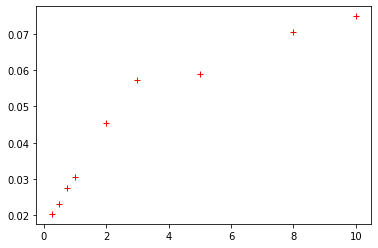

In [70]:
plt.plot(t1, y1, 'r+');

In [71]:
# let's now proceed with the OLS-Based-Calibration of Nelson-Siegel, applying 1.0 as starting value
# to optimize tau

In [72]:
curve, status = calibrate_ns_ols(t1, y1, tau0=1.0)
assert status.success
curve

NelsonSiegelCurve(beta0=0.0827348593755259, beta1=-0.06834039611685994, beta2=-0.02858768148315782, tau=1.0)

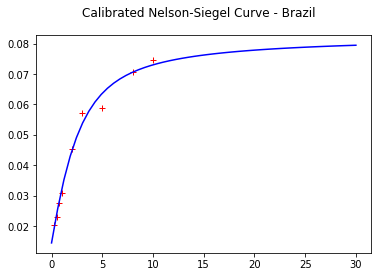

In [73]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle('Calibrated Nelson-Siegel Curve - Brazil')
ax.plot(t, y, 'r+'); 
t1 = np.linspace(0, 30)
ax.plot(t1, curve(t1), 'b-')

In [74]:
# with regression, it's important to check the error function given tau for Nelson-Siegel

In [44]:
from nelson_siegel_svensson.calibrate import calibrate_ns_ols, errorfn_ns_ols, calibrate_nss_ols, errorfn_nss_ols

In [45]:
taus = np.linspace(0.5, 6, 300)
err = np.array([errorfn_ns_ols(tau, t, y) for tau in taus])

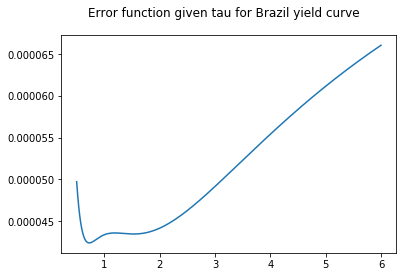

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle('Error function given tau for Brazil yield curve')
ax.plot(taus, err);

In [47]:
# let's now explore the Nelson-Siegel-Svensson package to check the differences in the curves and errors

In [50]:
t = np.array([0.25, 0.5, 0.75, 1.0, 2.0, 3.0, 5.0, 8.0, 10.0])

y = np.array([0.0204, 0.023, 0.02763, 0.03068, 0.04547, 0.05712, 0.05894, 0.07053, 0.0748])

In [54]:
curve, status = calibrate_nss_ols(t, y)
assert status.success
curve

NelsonSiegelSvenssonCurve(beta0=0.15598995329856363, beta1=-0.14418978144737374, beta2=0.047522155367828674, beta3=-0.2074316655773116, tau1=2.0, tau2=5.0)

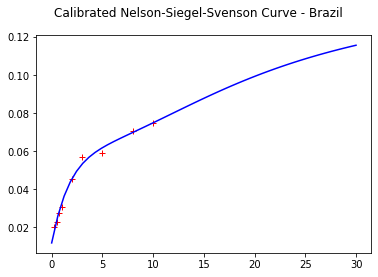

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle('Calibrated Nelson-Siegel-Svensson Curve - Brazil')
ax.plot(t, y, 'r+'); 
t2 = np.linspace(0, 30)
ax.plot(t2, curve(t2), 'b-')

In [67]:
taus = np.linspace(0.5, 5)
err = np.array([errorfn_ns_ols(tau, t, y) for tau in taus])

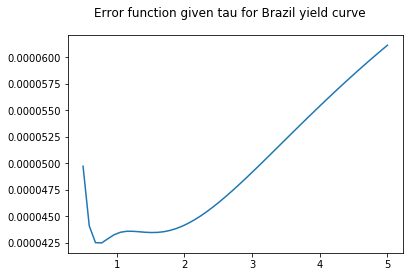

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.suptitle('Error function given tau for Brazil yield curve')
ax.plot(taus, err);

In [ ]:
x1 = [t1, curve(y1)]
y1 = 